<a href="https://colab.research.google.com/github/SamyakDhole/Hello-World/blob/master/Fx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Startup
%%time
%%capture
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
!pip install yfinance --upgrade --no-cache-dir
!pip install tsfresh
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import sklearn
#import xgboost
#import lightgbm
#import talib #Need python 3.5 quantopian channel
#from finta import TA as ta #https://github.com/peerchemist/finta
#Alternative https://github.com/kylejusticemagnuson/pyti
from datetime import date

CPU times: user 475 ms, sys: 90.8 ms, total: 566 ms
Wall time: 1min 46s


In [0]:
#Display entire df
pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [0]:

EURUSD = yf.download("EURUSD=X", start="2010-01-01", end="2111-04-30")
EURUSD = EURUSD/EURUSD.Close[0]
USDJPY = yf.download("USDJPY=X", start="2010-01-01", end="2111-04-30")
USDJPY = USDJPY/USDJPY.Close[0]
GBPUSD = yf.download("GBPUSD=X", start="2010-01-01", end="2111-04-30")
GBPUSD = GBPUSD/GBPUSD.Close[0]
AUDUSD = yf.download("AUDUSD=X", start="2010-01-01", end="2111-04-30")
AUDUSD = AUDUSD/AUDUSD.Close[0]
USDCHF = yf.download("USDCHF=X", start="2010-01-01", end="2111-04-30")
USDCHF = USDCHF/USDCHF.Close[0]
NZDUSD = yf.download("NZDUSD=X", start="2010-01-01", end="2111-04-30")
NZDUSD = NZDUSD/NZDUSD.Close[0]
USDCAD = yf.download("USDCAD=X", start="2010-01-01", end="2111-04-30")
USDCAD = USDCAD/USDCAD.Close[0]
USD = EURUSD**(-1/7) * USDJPY**(1/7) * GBPUSD**(-1/7) * AUDUSD**(-1/7)* USDCHF**(1/7) * NZDUSD**(-1/7) * USDCAD**(1/7)
iUSD = USD**-1
#USD = USD/USD.iloc[0]
#display(USD)

USDX= yf.download("DX-Y.NYB", start="2010-01-01", end="2111-04-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [0]:
def Volatality(df):
    high = df.High
    low = df.Low
    close = df.Close
    Open = df.Open
    ATR = talib.ATR(high, low, close, timeperiod=14)
    df['ATR'] = ATR
    df['SMA20ATR'] = talib.SMA(ATR,20)

    NATR = talib.NATR(high, low, close, timeperiod=14)
    df['NATR'] = NATR

    TRANGE = talib.TRANGE(high, low, close)
    df['TRANGE'] = TRANGE
    
    EVZ = pdr.get_data_yahoo("^EVZ", start="1900-01-01", end="2100-01-01", interval="1d", index_col=0)
    df['EVZ_o'] = EVZ.Open
    df['EVZ_h'] = EVZ.High
    df['EVZ_l'] = EVZ.Low
    df['EVZ_c'] = EVZ.Close
    return df

# Collapsible

In [0]:
def Momentum(df):
    high = df.High
    low = df.Low
    close = df.Close
    Open = df.Open
    
    ADX = talib.ADX(high, low, close, timeperiod=14)
    df['ADX'] = ADX

    ADXR = talib.ADXR(high, low, close, timeperiod=14)
    df['ADXR'] = ADXR

    APO = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
    df['APO'] = APO

    aroondown, aroonup = talib.AROON(high, low, timeperiod=14)
    df['aroondown'] = aroondown
    df['aroonup'] = aroonup

    aroonosc = talib.AROONOSC(high, low, timeperiod=14)
    df['aroonosc'] = aroonosc

    BOP = talib.BOP(Open, high, low, close)
    df['BOP'] = BOP

    CCI = talib.CCI(high, low, close, timeperiod=14)
    df['CCI'] = CCI

    CMO = talib.CMO(close, timeperiod=14)
    df['CMO'] = CMO

    DX = talib.DX(high, low, close, timeperiod=14)
    df['DX'] = DX

    macd, macdsignal, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    df['macd'] = macd
    df['macdsignal'] = macdsignal
    df['macdhist'] = macdhist

    #add other macd later

    #MFI = talib.MFI(high, low, close, volume, timeperiod=14)
    #df['MFI'] = MFI

    minusDI = talib.MINUS_DI(high, low, close, timeperiod=14)
    df['minusDI'] = minusDI

    minusDM = talib.MINUS_DM(high, low, timeperiod=14)
    df['minusDM'] = minusDM

    MOM = talib.MOM(close, timeperiod=10)
    df['MOM'] = MOM

    plusDI = talib.PLUS_DI(high, low, close, timeperiod=14)
    df['plusDI'] = plusDI

    plusDM = talib.PLUS_DM(high, low, timeperiod=14)
    df['plusDM'] = plusDM

    PPO = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
    df['PPO'] = PPO

    ROC = talib.ROC(close, timeperiod=10)
    df['ROC'] = ROC

    ROCP = talib.ROCP(close, timeperiod=10)
    df['ROCP'] = ROCP

    ROCR = talib.ROCR(close, timeperiod=10)
    df['ROCR'] = ROCR

    RSI = talib.RSI(close, timeperiod=14)
    df['RSI'] = RSI

    slowk, slowd = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    df['slowk'] = slowk
    df['slowd'] = slowd

    fastk, fastd = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
    df['fastk'] = fastk
    df['fastd'] = fastd

    fastkrsi, fastdrsi = talib.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    df['fastkrsi'] = fastkrsi
    df['fastdrsi'] = fastdrsi

    TRIX = talib.TRIX(close, timeperiod=30)
    df['TRIX'] = TRIX

    ULTOSC = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    df['ULTOSC'] = ULTOSC

    WILLR = talib.WILLR(high, low, close, timeperiod=14)
    df['WILLR'] = WILLR

    TSF = talib.TSF(close, timeperiod=14) #statistical not momentum
    df['TSF'] = TSF

    return(df)

In [0]:
def Overlap(df):
    high = df.High
    low = df.Low
    close = df.Close
    Open = df.Open
    BBupperband, BBmiddleband, BBlowerband = talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    df['BBupperband'] = BBupperband
    df['BBmiddleband'] = BBmiddleband
    df['BBlowerband'] = BBlowerband

    DEMA30 = talib.DEMA(close, timeperiod=30)
    df['DEMA30'] = DEMA30

    EMA30 = talib.EMA(close, timeperiod=30)
    df['EMA30'] = EMA30

    HT_TRENDLINE = talib.HT_TRENDLINE(close)
    df['HT_TRENDLINE'] = HT_TRENDLINE

    KAMA30 = talib.KAMA(close, timeperiod=30)
    df['KAMA30'] = KAMA30

    #MAVP2_30 = talib.MAVP(close, periods, minperiod=2, maxperiod=30, matype=0)
    #df['MAVP2_30'] = MAVP2_30

    MIDPOINT14 = talib.MIDPOINT(close, timeperiod=14)
    df['MIDPOINT14'] = MIDPOINT14

    df['MIDPRICE14'] = talib.MIDPRICE(high, low, timeperiod=14)

    df['SAR'] = talib.SAR(high, low, acceleration=0, maximum=0)

    #real = talib.SAREXT(high, low, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)

    df['SMA5'] = talib.SMA(close, timeperiod=5)

    df['SMA10'] = talib.SMA(close, timeperiod=10)
    
    df['SMA20'] = talib.SMA(close, timeperiod=10)

    df['SMA40'] = talib.SMA(close, timeperiod=10)

    df['SMA80'] = talib.SMA(close, timeperiod=10)

    df['SMA160'] = talib.SMA(close, timeperiod=10)

    df['T3'] = talib.T3(close, timeperiod=5, vfactor=0)

    df['TEMA30'] = talib.TEMA(close, timeperiod=30)

    df['TRIMA30'] = talib.TRIMA(close, timeperiod=30)

    df['WMA30'] = talib.WMA(close, timeperiod=30)

    return df

In [0]:
def Price_transform(df):
    high = df.High
    low = df.Low
    close = df.Close
    Open = df.Open 
    df['AVGPRICE'] = talib.AVGPRICE(Open, high, low, close)
    df['MEDPRICE'] = talib.MEDPRICE(high, low)
    df['TYPPRICE'] = talib.TYPPRICE(high, low, close)
    df['WCLPRICE'] = talib.WCLPRICE(high, low, close)
    return df

In [0]:
def Pattern_recognition(df):
    high = df.High
    low = df.Low
    close = df.Close
    Open = df.Open 
    df['CDL2CROWS'] = talib.CDL2CROWS(Open, high, low, close)
    df['CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(Open, high, low, close)
    df['CDL3INSIDE'] = talib.CDL3INSIDE(Open, high, low, close)
    df['CDL3LINESTRIKE'] = talib.CDL3LINESTRIKE(Open, high, low, close)
    df['CDL3OUTSIDE'] = talib.CDL3OUTSIDE(Open, high, low, close)
    df['CDL3STARSINSOUTH'] = talib.CDL3STARSINSOUTH(Open, high, low, close)
    df['CDL3WHITESOLDIERS'] = talib.CDL3WHITESOLDIERS(Open, high, low, close)
    df['CDLABANDONEDBABY'] = talib.CDLABANDONEDBABY(Open, high, low, close, penetration=0)
    df['CDLADVANCEBLOCK'] = talib.CDLADVANCEBLOCK(Open, high, low, close)
    df['CDLBELTHOLD'] = talib.CDLBELTHOLD(Open, high, low, close)
    df['CDLBREAKAWAY'] = talib.CDLBREAKAWAY(Open, high, low, close)
    df['CDLCLOSINGMARUBOZU'] = talib.CDLCLOSINGMARUBOZU(Open, high, low, close)
    df['CDLCONCEALBABYSWALL'] = talib.CDLCONCEALBABYSWALL(Open, high, low, close)
    df['CDLCOUNTERATTACK'] = talib.CDLCOUNTERATTACK(Open, high, low, close)
    df['CDLDARKCLOUDCOVER'] = talib.CDLDARKCLOUDCOVER(Open, high, low, close, penetration=0)
    df['CDLDOJI'] = talib.CDLDOJI(Open, high, low, close)
    df['CDLDOJISTAR'] = talib.CDLDOJISTAR(Open, high, low, close)
    df['CDLDRAGONFLYDOJI'] = talib.CDLDRAGONFLYDOJI(Open, high, low, close)
    df['CDLENGULFING'] = talib.CDLENGULFING(Open, high, low, close)
    df['CDLEVENINGDOJISTAR'] = talib.CDLEVENINGDOJISTAR(Open, high, low, close, penetration=0)
    df['CDLEVENINGSTAR'] = talib.CDLEVENINGSTAR(Open, high, low, close, penetration=0)
    df['CDLGAPSIDESIDEWHITE'] = talib.CDLGAPSIDESIDEWHITE(Open, high, low, close)
    df['CDLGRAVESTONEDOJI'] = talib.CDLGRAVESTONEDOJI(Open, high, low, close)
    df['CDLHAMMER'] = talib.CDLHAMMER(Open, high, low, close)
    df['CDLHANGINGMAN'] = talib.CDLHANGINGMAN(Open, high, low, close)
    df['CDLHARAMI'] = talib.CDLHARAMI(Open, high, low, close)
    df['CDLHARAMICROSS'] = talib.CDLHARAMICROSS(Open, high, low, close)
    df['CDLHIGHWAVE'] = talib.CDLHIGHWAVE(Open, high, low, close)
    df['CDLHIKKAKE'] = talib.CDLHIKKAKE(Open, high, low, close)
    df['CDLHIKKAKEMOD'] = talib.CDLHIKKAKEMOD(Open, high, low, close)
    df['CDLHOMINGPIGEON'] = talib.CDLHOMINGPIGEON(Open, high, low, close)
    df['CDLIDENTICAL3CROWS'] = talib.CDLIDENTICAL3CROWS(Open, high, low, close)
    df['CDLINNECK'] = talib.CDLINNECK(Open, high, low, close)
    df['CDLINVERTEDHAMMER'] = talib.CDLINVERTEDHAMMER(Open, high, low, close)
    df['CDLKICKING'] = talib.CDLKICKING(Open, high, low, close)
    df['CDLKICKINGBYLENGTH'] = talib.CDLKICKINGBYLENGTH(Open, high, low, close)
    df['CDLLADDERBOTTOM'] = talib.CDLLADDERBOTTOM(Open, high, low, close)
    df['CDLLONGLEGGEDDOJI'] = talib.CDLLONGLEGGEDDOJI(Open, high, low, close)
    df['CDLLONGLINE'] = talib.CDLLONGLINE(Open, high, low, close)
    df['CDLMARUBOZU'] = talib.CDLMARUBOZU(Open, high, low, close)
    df['CDLMATCHINGLOW'] = talib.CDLMATCHINGLOW(Open, high, low, close)
    df['CDLMATHOLD'] = talib.CDLMATHOLD(Open, high, low, close, penetration=0)
    df['CDLMORNINGDOJISTAR'] = talib.CDLMORNINGDOJISTAR(Open, high, low, close, penetration=0)
    df['CDLMORNINGSTAR'] = talib.CDLMORNINGSTAR(Open, high, low, close, penetration=0)
    df['CDLONNECK'] = talib.CDLONNECK(Open, high, low, close)
    df['CDLPIERCING'] = talib.CDLPIERCING(Open, high, low, close)
    df['CDLRICKSHAWMAN'] = talib.CDLRICKSHAWMAN(Open, high, low, close)
    df['CDLRISEFALL3METHODS'] = talib.CDLRISEFALL3METHODS(Open, high, low, close)
    df['CDLSEPARATINGLINES'] = talib.CDLSEPARATINGLINES(Open, high, low, close)
    df['CDLSHOOTINGSTAR'] = talib.CDLSHOOTINGSTAR(Open, high, low, close)
    df['CDLSHORTLINE'] = talib.CDLSHORTLINE(Open, high, low, close)
    df['CDLSPINNINGTOP'] = talib.CDLSPINNINGTOP(Open, high, low, close)
    df['CDLSTALLEDPATTERN'] = talib.CDLSTALLEDPATTERN(Open, high, low, close)
    df['CDLSTICKSANDWICH'] = talib.CDLSTICKSANDWICH(Open, high, low, close)
    df['CDLTAKURI'] = talib.CDLTAKURI(Open, high, low, close)
    df['CDLTASUKIGAP'] = talib.CDLTASUKIGAP(Open, high, low, close)
    df['CDLTHRUSTING'] = talib.CDLTHRUSTING(Open, high, low, close)
    df['CDLTRISTAR'] = talib.CDLTRISTAR(Open, high, low, close)
    df['CDLUNIQUE3RIVER'] = talib.CDLUNIQUE3RIVER(Open, high, low, close)
    df['CDLUPSIDEGAP2CROWS'] = talib.CDLUPSIDEGAP2CROWS(Open, high, low, close)
    df['CDLXSIDEGAP3METHODS'] = talib.CDLXSIDEGAP3METHODS(Open, high, low, close)
    return df

In [0]:

def ta_math(df):
    high = df.High
    low = df.Low
    close = df.Close
    Open = df.Open 
    df['BETA']= talib.BETA(high, low, timeperiod=5)
    df['CORREL']= talib.CORREL(high, low, timeperiod=30)
    df['LINEARREG']= talib.LINEARREG(close, timeperiod=14)
    df['LINEARREG_ANGLE']= talib.LINEARREG_ANGLE(close, timeperiod=14)
    df['LINEARREG_INTERCEPT']= talib.LINEARREG_INTERCEPT(close, timeperiod=14)
    df['LINEARREG_SLOPE']= talib.LINEARREG_SLOPE(close, timeperiod=14)
    df['STDDEV']= talib.STDDEV(close, timeperiod=5, nbdev=1)
    df['TSF']= talib.TSF(close, timeperiod=14)
    df['VAR']= talib.VAR(close, timeperiod=5, nbdev=1)

    df['ACOS']= talib.ACOS(close)
    df['ASIN']= talib.ASIN(close)
    df['ATAN']= talib.ATAN(close)
    df['CEIL']= talib.CEIL(close)
    df['COS']= talib.COS(close)
    df['COSH']= talib.COSH(close)
    df['EXP']= talib.EXP(close)
    df['FLOOR']= talib.FLOOR(close)
    df['LN']= talib.LN(close)
    df['LOG10'] =talib.LOG10(close)

    df['SIN'] = talib.SIN(close)
    df['SINH'] = talib.SINH(close)
    df['SQRT'] = talib.SQRT(close)
    df['TAN'] = talib.TAN(close)
    df['TANH'] = talib.TANH(close)
    df['DIV'] = talib.DIV(high, low)
    df['MAX'] = talib.MAX(close, timeperiod=30)
    df['MIN'] = talib.MIN(close, timeperiod=30)
    df['MULT'] = talib.MULT(high, low)
    df['SUB'] = talib.SUB(high, low)
    df['SUM'] = talib.SUM(close, timeperiod=30)

    df['MAXINDEX'] = talib.MAXINDEX(close, timeperiod=30)
    df['MININDEX'] = talib.MININDEX(close, timeperiod=30)
    return df

In [0]:
def Cycle(df):
    high = df.High
    low = df.Low
    close = df.Close
    Open = df.Open 
    df['HT_DCPERIOD'] = talib.HT_DCPERIOD(close)
    df['HT_DCPHASE'] = talib.HT_DCPHASE(close)
    df['inphase'], df['quadrature'] = talib.HT_PHASOR(close)
    df['sine'], df['leadsine'] = talib.HT_SINE(close)
    df['trend_mode'] = talib.HT_TRENDMODE(close)
    return(df)

In [0]:
def heikin_ashi(df):
    heikin_ashi_df = pd.DataFrame(index=df.index.values, columns=['Open', 'High', 'Low', 'Close'])
    
    heikin_ashi_df['Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
    
    for i in range(len(df)):
        if i == 0:
            heikin_ashi_df.iat[0, 0] = df['Open'].iloc[0]
        else:
            heikin_ashi_df.iat[i, 0] = (heikin_ashi_df.iat[i-1, 0] + heikin_ashi_df.iat[i-1, 3]) / 2
        
    heikin_ashi_df['High'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['High']).max(axis=1)   
    heikin_ashi_df['Low'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['Low']).min(axis=1)
    
    df['ha_close'] = heikin_ashi_df['Close']
    df['ha_high'] = heikin_ashi_df['High']
    df['ha_low'] = heikin_ashi_df['Low']
    df['ha_open'] = heikin_ashi_df['Open']

    return df

In [0]:

def fill_for_noncomputable_vals(input_data, result_data):
    non_computable_values = np.repeat(
        np.nan, len(input_data) - len(result_data)
        )
    filled_result_data = np.append(non_computable_values, result_data)
    return filled_result_data
def conversion_base_line_helper(close, period):
    """
    The only real difference between TenkanSen and KijunSen is the period value
    """
    #catch_errors.check_for_period_error(close, period)
    cblh = [(np.max(close[idx+1-period:idx+1]) +
            np.min(close[idx+1-period:idx+1])) / 2 for idx in range(period-1, len(close))]

    cblh = fill_for_noncomputable_vals(close, cblh)
    return np.array(cblh)


def tenkansen(close, period=9):
    """
    TenkanSen (Conversion Line)
    Formula:
    (H + L) / 2  :: default period=9
    """
    ts = conversion_base_line_helper(close, period)
    return np.array(ts)


def kijunsen(close, period=26):
    """
    KijunSen (Base Line)
    Formula:
    (H + L) / 2  :: default period=26
    """
    ks = conversion_base_line_helper(close, period)
    return np.array(ks)



def senkou_a(close):
    """
    Senkou A (Leading Span A)
    Formula:
    (TenkanSen + KijunSen) / 2 :: Shift Forward 26 bars
    """
    sa = (tenkansen(close) + kijunsen(close))*0.5
    # shift forward
    sa = np.roll(sa,26)
    return np.array(sa)


def senkou_b(close, period=52):
    """
    Senkou B (Leading Span B)
    Formula:
    (H + L) / 2  :: default period=52 :: shifted forward 26 bars
    """
    sb = conversion_base_line_helper(close, period)
    sb = np.roll(sb,26)
    return sb
def Ichimoku(df):
    close = df.Close
    df['tenkansen'] = tenkansen(close)
    df['kijunsen'] = kijunsen(close)
    df['span_a'] = senkou_a(close)
    df['span_b'] = senkou_b(close)
    return df

In [0]:

display(iUSD)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,1.000005,0.999831,0.999256,1.000000,1.000000,NaN
2010-01-04,0.999359,1.004585,1.000835,1.007023,1.007023,NaN
2010-01-05,1.007354,1.008776,1.007648,1.006141,1.006141,NaN
2010-01-06,1.006290,1.007563,1.006619,1.009706,1.009706,NaN
2010-01-07,1.009797,1.008110,1.006913,1.003845,1.003845,NaN
...,...,...,...,...,...,...
2020-01-14,0.848561,0.848904,0.848083,0.848644,0.848644,NaN
2020-01-15,0.848927,0.849742,0.848731,0.849071,0.849071,NaN
2020-01-16,0.850507,0.851768,0.850259,0.850516,0.850516,NaN


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



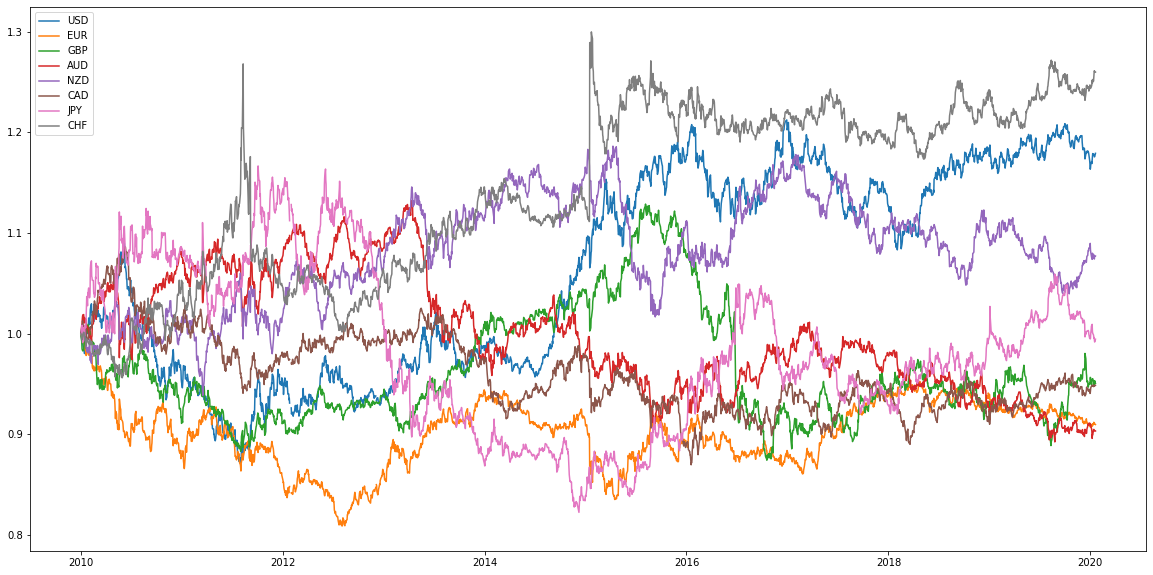

In [0]:


#plt.plot(USDX.Close/(max(USDX.Close)), label='USDX')
#plt.plot((EURUSD.Close)**-1/(max((EURUSD.Close)**-1)), label='EURUSD')
plt.figure(figsize=(20,10))
plt.plot(USD.Close, label='USD')
EUR = (EURUSD.Close*USD.Close)
plt.plot(EUR, label='EUR')
GBP = (GBPUSD.Close*USD.Close)
plt.plot(GBP, label='GBP')
AUD = (AUDUSD.Close*USD.Close)
plt.plot(AUD, label='AUD')
NZD = (NZDUSD.Close*USD.Close)
plt.plot(NZD, label='NZD')
CAD = (USDCAD.Close*iUSD.Close)**-1
plt.plot(CAD, label='CAD')
JPY = (USDJPY.Close*iUSD.Close)**-1
plt.plot(JPY, label='JPY')
CHF = (USDCHF.Close*iUSD.Close)**-1
plt.plot(CHF, label='CHF')
plt.legend()


In [0]:

df = []
df = pd.DataFrame(df)
#df = USD.Close
df['USD'] = USD.Close
df['AUD'] = AUD
df['EUR'] = EUR
df['CAD'] = CAD
df['GBP'] = GBP
df['NZD'] = NZD
df['CHF'] = CHF
df['JPY'] = JPY

display(df)

,USD,AUD,EUR,CAD,GBP,NZD,CHF,JPY
Date,,,,,,,,
2010-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-04,0.993026,1.008521,0.995375,1.002756,0.991842,1.006369,0.997658,0.997589
2010-01-05,0.993897,1.008669,0.992241,1.005084,0.985140,1.006660,0.994089,1.008385
2010-01-06,0.990387,1.014637,0.991357,1.008911,0.983690,1.008880,0.996459,0.996435
2010-01-07,0.996170,1.017563,0.991192,1.012740,0.983884,1.007483,0.996459,0.991156
...,...,...,...,...,...,...,...,...
2020-01-14,1.178351,0.904792,0.911873,0.948775,0.948659,1.077837,1.255070,0.995457
2020-01-15,1.177758,0.904031,0.911019,0.947579,0.950688,1.074510,1.259147,0.996206
2020-01-16,1.175756,0.903966,0.911358,0.947964,0.950434,1.074225,1.261403,0.994251


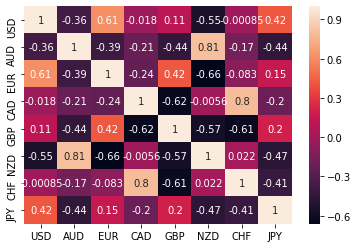

In [0]:
Var_Corr = df.iloc[-30:,:].corr(method='pearson', min_periods=1)
# plot the heatmap and annotation on it
sb.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [0]:
!pip install tsfresh
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

In [0]:
2+24

26

In [0]:
#Classifier

def Classifier(df, rr=0.9,sl=1.5, d=15):
    df = df.copy(deep=True)
    df = df.dropna(how='all') 
    high = df.High
    low = df.Low
    close = df.Close
    Open = df.Open
    ATR = talib.ATR(high, low, close, timeperiod=14)
    df['ATR'] = ATR
    tp = rr*sl
    Classifier = np.zeros(len(close))
    Profit = np.zeros(len(close))
    df['tplv'] = np.nan
    df['tpsv'] = np.nan
    df['tllv'] = np.nan
    df['tllv'] = np.nan
    df['Color'] = "green"
    #take profits, long and short
    df['tplv'] = df.Close + tp*df.ATR
    df['tpsv'] = df.Close - tp*df.ATR
    #take loss, long and short
    df['tllv'] = df.Close - sl*df.ATR
    df['tlsv'] = df.Close + sl*df.ATR
    for n in range(0,len(close)-d):
        #take profits, long and short
        tplv = df.tplv[n]
        tpsv = df.tpsv[n]
        #take loss, long and short
        tllv = df.tllv[n]
        tlsv = df.tlsv[n]

        c = 0 #Do nothing
        for i in range (1,d):
            if (high[n+i] > tplv):
                c = 1 #long
                Profit[n] = tplv - close[n] 
                break
            if low[n+i] < tpsv:
                c = -1 #short
                Profit[n] = close[n]-tpsv 
                break
        #check for stoploss
        #print(i)
        if c == -1 & i<d:
            for j in range (0,i):
                if high[n+j] > tlsv:
                    c = 0
                    Profit[n] = 0
                    break
        if c == 1& i<d:
            for j in range (0,i):
                if low[n+j] < tlsv:
                    c = 0
                    Profit[n] = 0
                    break

        if c == 1:
            color = 'blue'
        if c == 0:
            color = 'green'
        if c == -1:
            color = 'red'
        Classifier[n] = c
        df.Color[n] = color
    df['Classifier'] = Classifier
    df['Profit'] = Profit
    number_of_long =  df[df.Classifier == 1].shape[0]
    number_of_short =  df[df.Classifier == -1].shape[0]
    number_of_nothing =  df[df.Classifier == 0].shape[0]
    trade_ratio =  (number_of_short+number_of_long)/(number_of_short+number_of_long+number_of_nothing)
    #print("Longs: \n" + str(number_of_long))
    #print("Shorts: \n" + str(number_of_short))
    #print("Total trades: \n" + str(number_of_short+number_of_long))
    #print("Total days: \n" + str(number_of_short+number_of_long+number_of_nothing))
    
    #print("\n\nTotal Profit: " + str(np.abs(np.sum(Profit))))
    #print("Trade ratio: " + str(trade_ratio))
    
    return df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,ATR,tplv,tpsv,tllv,Color,tlsv,Classifier,Profit
Date,,,,,,,,,,,,,,
2010-01-01,0.999995,1.000169,1.000745,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,green,NaN,0.0,0.0
2010-01-04,1.000641,0.995436,0.999166,0.993026,0.993026,NaN,NaN,NaN,NaN,NaN,green,NaN,0.0,0.0
2010-01-05,0.992700,0.991301,0.992411,0.993897,0.993897,NaN,NaN,NaN,NaN,NaN,green,NaN,0.0,0.0
2010-01-06,0.993749,0.992494,0.993424,0.990387,0.990387,NaN,NaN,NaN,NaN,NaN,green,NaN,0.0,0.0
2010-01-07,0.990298,0.991955,0.993135,0.996170,0.996170,NaN,NaN,NaN,NaN,NaN,green,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14,1.178465,1.177990,1.179130,1.178351,1.178351,NaN,0.003544,1.183136,1.173566,1.173034,green,1.183667,0.0,0.0
2020-01-15,1.177957,1.176828,1.178230,1.177758,1.177758,NaN,0.003400,1.182348,1.173168,1.172658,green,1.182858,0.0,0.0
2020-01-16,1.175769,1.174029,1.176113,1.175756,1.175756,NaN,0.003423,1.180378,1.171135,1.170621,green,1.180891,0.0,0.0


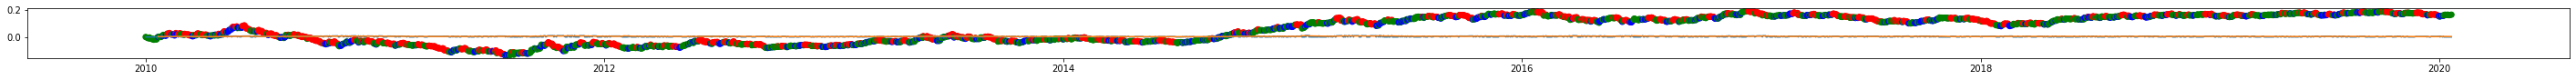

In [0]:
df = Classifier(USD, rr=0.9, sl=1.5, d=7)
c = df['Color']
plt.figure(figsize=(50,1))
plt.plot(df.index,df.Profit)
#plt.xlim([date(2014, 1, 1), date(2019, 12, 31)])
plt.scatter(df.index,np.log(df.Close),c=c)
plt.plot(df.ATR)
#plt.plot((df['ATR']-df['SMA20ATR'])*10) 
display(df)

Ideal rr = 0.9 ideal sl = 1.5 > tp = 1.35
days shows a saturation at day 15

In [0]:
import plotly.express as px
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
def plotter(df):
  heikin_ashi(df)
  c = df['Color']
  fig = go.Figure(
      data =[
             go.Scatter(x=df.index,
                        y=df.Low-0.01,
                        mode='markers',
                        marker=dict(
                            size=4,
                            color=c, #set color equal to a variable
                             # one of plotly colorscales
                        )),
             go.Candlestick(x=df.index,
                    open=df['ha_open'],
                    high=df['ha_high'],
                    low=df['ha_low'],
                    close=df['ha_close']
             )])
  fig.update_layout(
    autosize=False,
    width=3000,
    height=1000,
    )
             #
  #fig.update_yaxes(range=[1.1, 1.2])           
  fig.show()
  return
#  
  #fig.show()

plotter(df[-114:-14])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st